# Import Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Loading Data

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

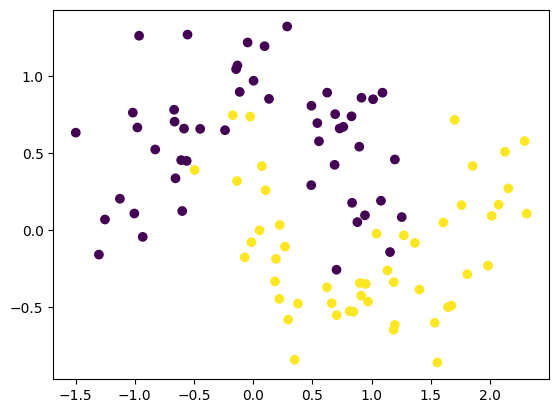

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Modeling

In [6]:
# lassification ANN Model
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

In [7]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam = Adam(learning_rate=0.01)

In [9]:
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [11]:
history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 17s 2ms/step


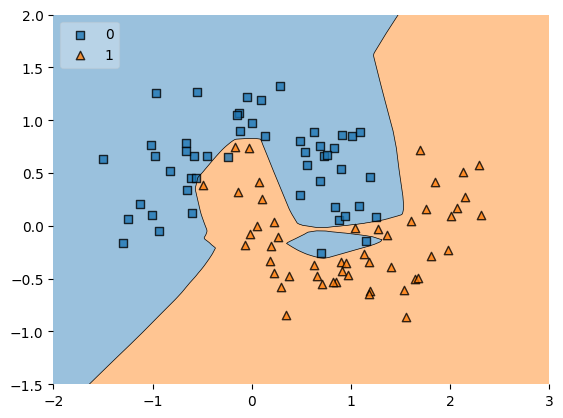

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

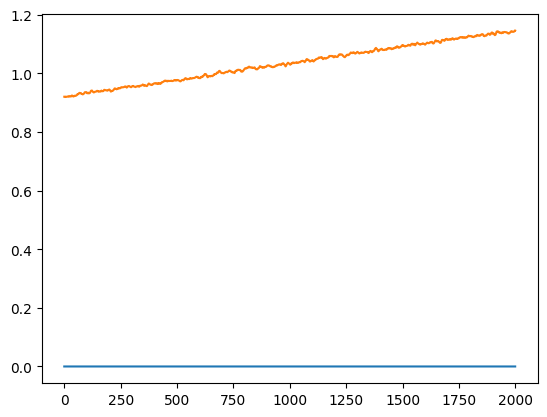

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [16]:
# This graph showing us overfitting 

### Now let's try with Regularization

In [23]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",
                 kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",
                 kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
adam = Adam(learning_rate=0.01)

In [27]:
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 18s 2ms/step


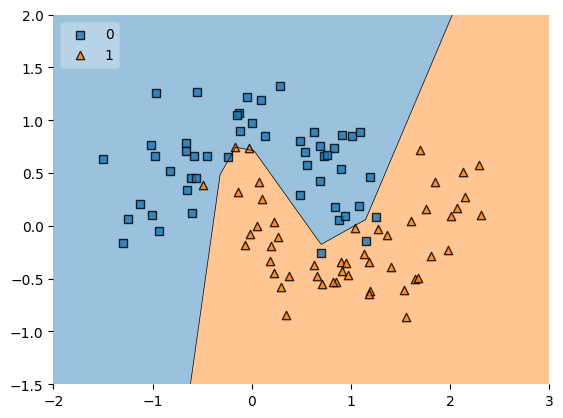

In [29]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

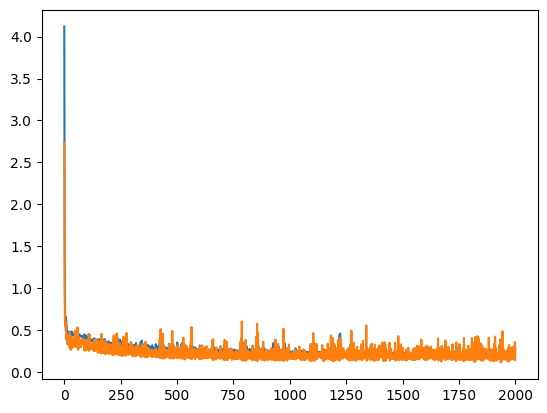

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

46875/46875 [==============================] - 84s 2ms/step


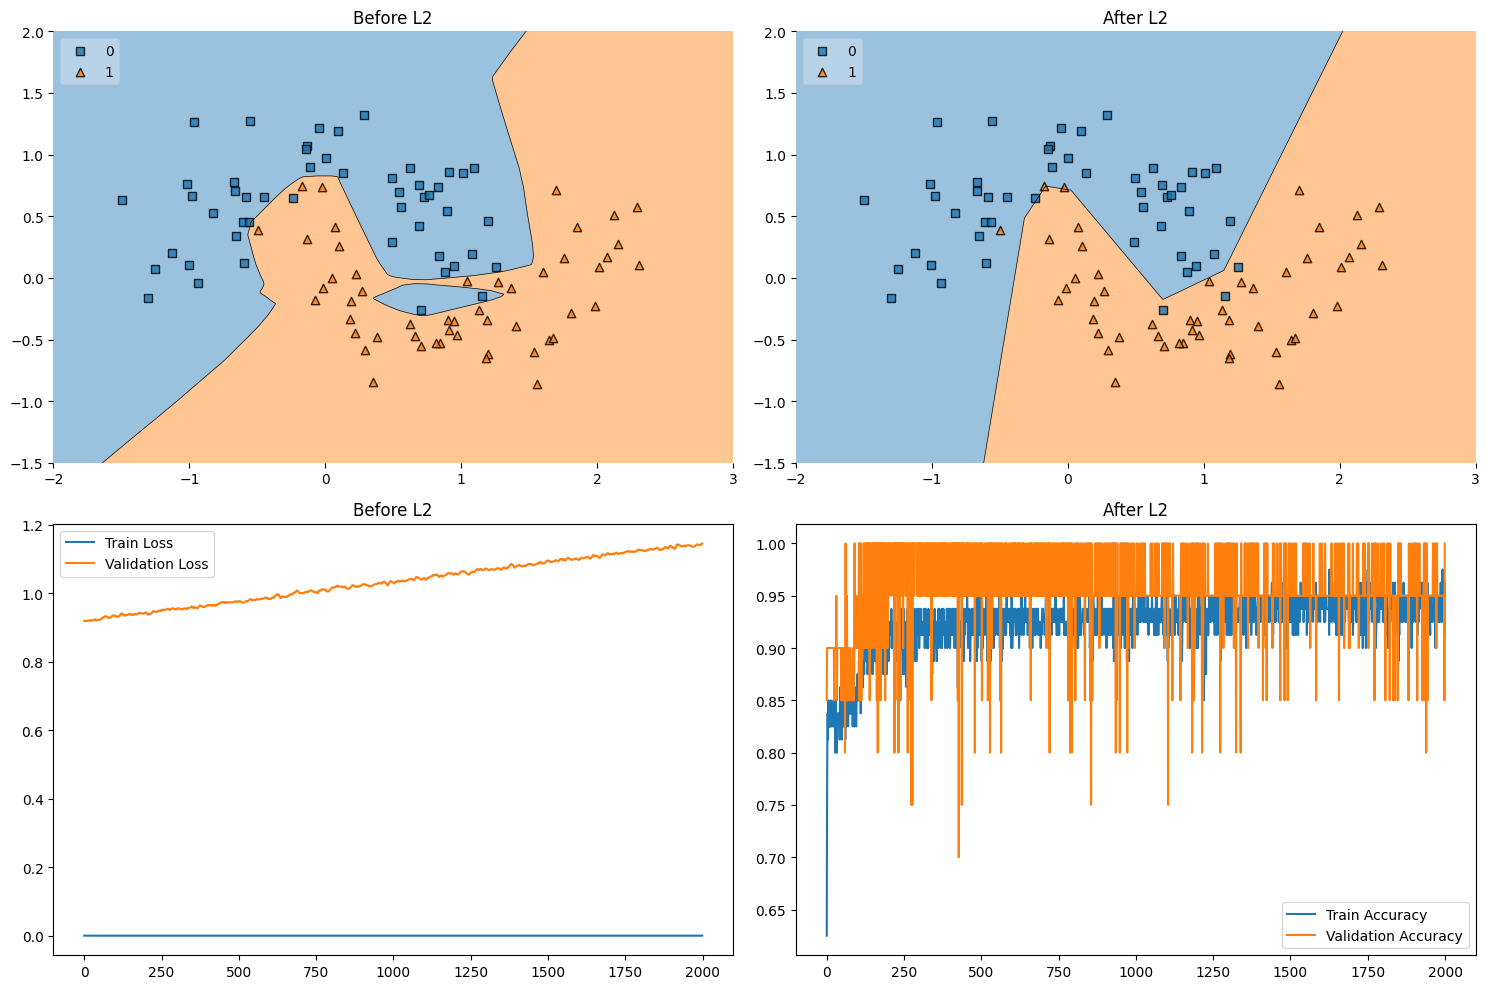

In [34]:
# Assuming you have model1, model2, and history for both models

plt.figure(figsize=(15, 10))

# Decision regions for model 1
plt.subplot(2, 2, 1)
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title('Before L2')

# Loss curve for model 1
plt.subplot(2, 2, 2)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.title('After L2')

# Loss curve for model 2
plt.subplot(2, 2, 3)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Before L2')

# Accuracy curve for model 2
plt.subplot(2, 2, 4)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('After L2')

plt.tight_layout()
plt.show()

In [35]:
# See the difference

In [44]:
model1.get_weights()[0].shape, model2.get_weights()[0].shape

((2, 128), (2, 128))

In [42]:
# see input 2 and 128 layers as we set it before now we can reshape it let's do it

In [46]:
model1.get_weights()[0].reshape(256).shape, model2.get_weights()[0].reshape(256).shape

((256,), (256,))

In [47]:
# have a loot it's changed 
# let's keep this into variable

In [48]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

In [ ]:
# let's check both model outliers now

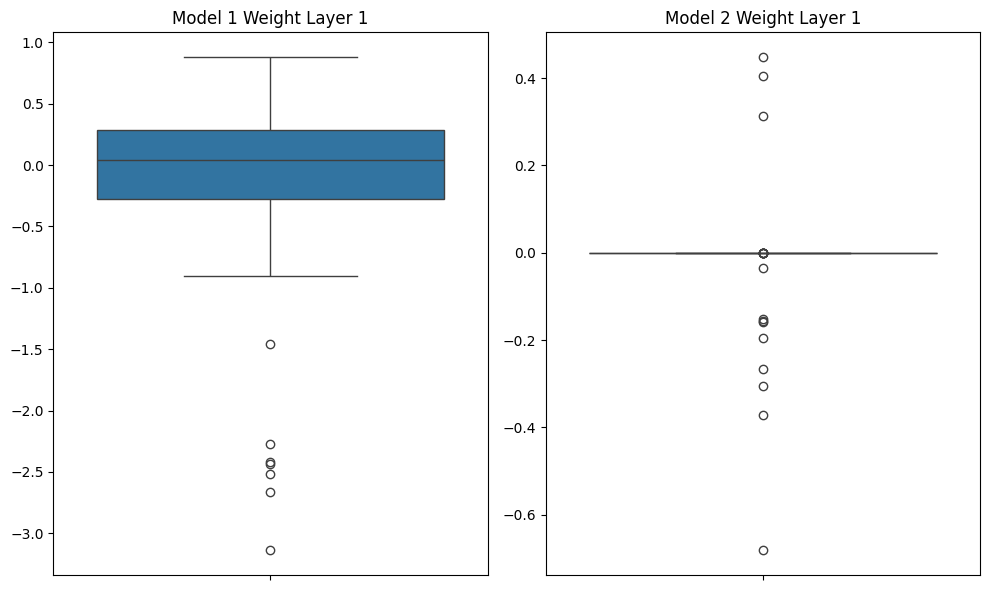

In [61]:
# Assuming you have model1_weight_layer1 and model2_weight_layer1 data
plt.figure(figsize=(10, 6))

# Box plot for model 1
plt.subplot(1, 2, 1)
sns.boxplot(y=model1_weight_layer1)
plt.title('Model 1 Weight Layer 1')

# Box plot for model 2
plt.subplot(1, 2, 2)
sns.boxplot(y=model2_weight_layer1)
plt.title('Model 2 Weight Layer 1')

plt.tight_layout()
plt.show()


In [50]:
# See the difference

In [57]:
# Model1
min = model1_weight_layer1.min()
print(f'Min: {min}')
max = model1_weight_layer1.max()
print(f'Max: {max}')

Min: -3.1405539512634277
Max: 0.8814505934715271


In [58]:
# Model2
min = model2_weight_layer1.min()
print(f'Min: {min}')
max = model2_weight_layer1.max()
print(f'Max: {max}')

Min: -0.682170569896698
Max: 0.44840186834335327


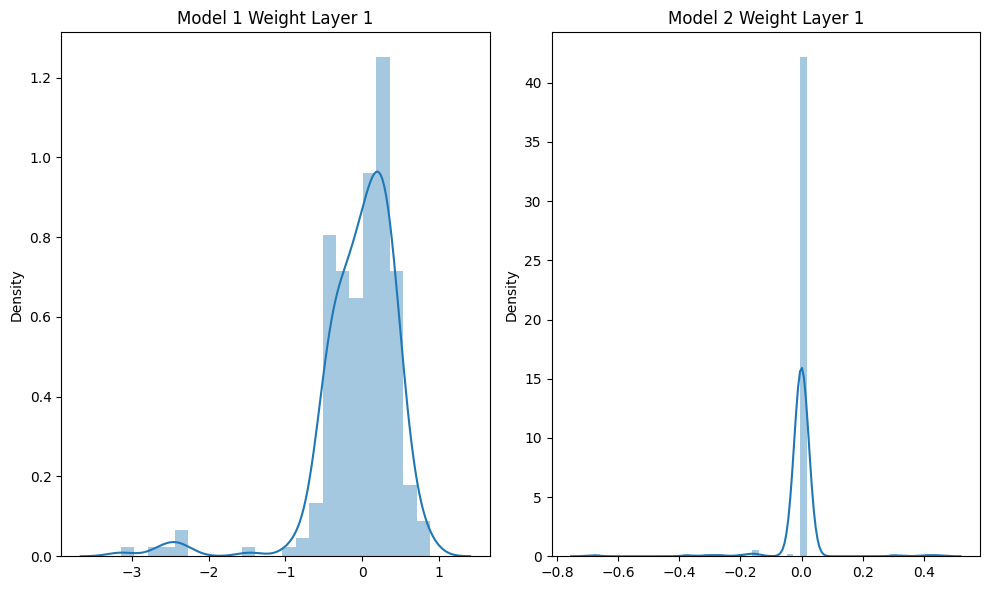

In [67]:
# Assuming you have model1_weight_layer1 and model2_weight_layer1 data
plt.figure(figsize=(10, 6))

# Box plot for model 1
plt.subplot(1, 2, 1)
sns.distplot(model1_weight_layer1)
plt.title('Model 1 Weight Layer 1')

# Box plot for model 2
plt.subplot(1, 2, 2)
sns.distplot(model2_weight_layer1)
plt.title('Model 2 Weight Layer 1')

plt.tight_layout()
plt.show()

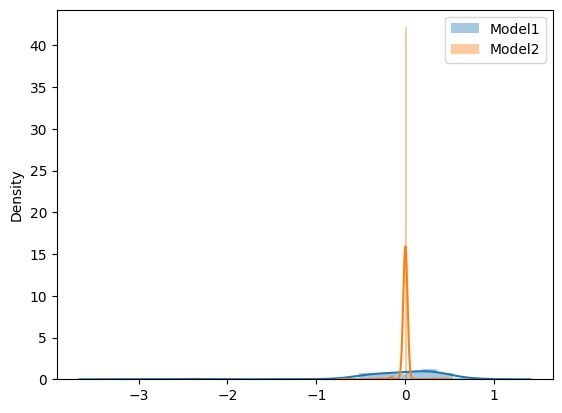

In [69]:
sns.distplot(model1_weight_layer1, label='Model1')
sns.distplot(model2_weight_layer1, label='Model2')
plt.legend()

In [70]:
model1.get_weights()[0].reshape(256)

array([-4.92991805e-01, -2.76584834e-01, -4.17442709e-01, -4.57340479e-01,
       -2.12937966e-01, -1.31315663e-01, -4.22306418e-01, -4.49223191e-01,
       -2.20794380e-01,  2.81327039e-01, -1.33806005e-01,  1.70283448e-02,
        5.27246892e-02,  7.51249418e-02,  2.41504714e-01, -3.11200500e-01,
        3.79791677e-01,  2.51629472e-01, -5.22172034e-01,  3.91649514e-01,
        2.40150377e-01, -4.47856694e-01,  2.58239836e-01, -4.09938037e-01,
       -1.50238976e-01,  4.34223503e-01, -2.71275282e-01, -4.47090656e-01,
       -4.09092903e-01,  6.65380776e-01,  9.51146334e-02, -2.46160790e-01,
        5.81563592e-01,  2.86694050e-01, -2.65030414e-01, -3.88505727e-01,
       -3.86073381e-01, -5.19658208e-01, -4.79792863e-01,  2.35910773e-01,
       -4.51776952e-01, -5.04928306e-02, -4.53775406e-01, -4.78199601e-01,
       -1.73766330e-01,  4.57584739e-01,  2.51227081e-01,  1.04543045e-01,
       -2.87645459e-01,  3.89116377e-01, -4.87452686e-01, -4.80550051e-01,
       -8.13489437e-01,  